In [ ]:
# 201500684 박종혁

In [2]:
# 신경망 학습시키기
import scipy.special
import numpy as np

# 신경망 질의
# 신경망 클래스 정의3
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        # 입력, 은닉, 출력계층
        self.inodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        # 가중치 행렬
        self.wih = np.random.normal(0.0, pow(self.hnodes1, - 0.5), (self.hnodes1, self.inodes))
        # 은닉1->은닉2 가중치
        self.whh = np.random.normal(0.0, pow(self.hnodes1, - 0.5), (self.hnodes2, self.hnodes1))
        self.who = np.random.normal(0.0, pow(self.hnodes2, - 0.5), (self.onodes, self.hnodes2))
        
        # 학습률
        self.lr = learningrate
        
        # 활성함수 - 시그모이드
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 1. 입력->은닉1
        # 은닉계층1으로 들어오는 신호를 계산
        hidden_inputs1 = np.dot(self.wih, inputs)
        # 은닉계층1에서 나가는 신호를 계산
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        
        # 2. 은닉1->은닉2
        # 은닉계층2으로 들어오는 신호를 계산
        hidden_inputs2 = np.dot(self.whh, hidden_outputs1)
        # 은닉계층2에서 나가는 신호를 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        # 3. 은닉2->출력
        # 최종출력계층으로 들어오는 신호 계산
        final_inputs = np.dot(self.who, hidden_outputs2)
        # 최종출력계층에서 들어오는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉계층과 출력계층 간의 가중치 업데이트
        hidden_errors2 = np.dot(self.who.T, output_errors)
        # 은닉계층2와 은닉계층1의 가중치 업데이트
        hidden_errors1 = np.dot(self.whh.T, hidden_errors2)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs2))
        
        # 은닉계층1과 은닉계층2 간의 가중치 업데이트
        self.whh += self.lr * np.dot((hidden_errors2 * hidden_outputs2 * (1.0 - hidden_outputs2)), np.transpose(hidden_outputs1))
        
        # 입력계층과 은닉계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors1 * hidden_outputs1 * (1.0 - hidden_outputs1)), np.transpose(inputs))
    
    # 신경망 질의
    def query(self, inputs_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉계층1으로 들어오는 신호를 계산
        hidden_inputs1 = np.dot(self.wih, inputs)
        # 은닉계층1에서 나가는 신호를 계산
        hiddne_outputs1 = self.activation_function(hidden_inputs1)
        
        # 은닉계층2으로 들어오는 신호를 계산
        hidden_inputs2 = np.dot(self.whh, hiddne_outputs1)
        # 은닉계층2에서 나가는 신호를 계산
        hiddne_outputs2 = self.activation_function(hidden_inputs2)
        
        # 최종출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hiddne_outputs2)
        # 최종출력계층으로 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
# 노드의 갯수
input_nodes = 784
hidden_nodes1 = 280
hidden_nodes2 = 80
output_nodes = 10
# 학습률
learning_rate = 0.01
# 반복회수
epochs = 7

n = NeuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

In [21]:
# 신경망 학습시키기
import scipy.special
import numpy as np

# 신경망 질의
# 신경망 클래스 정의3
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        # 입력, 은닉, 출력계층
        self.inodes = inputnodes
        self.hnodes1 = hiddennodes1
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        
        # 가중치 행렬
        self.wih = np.random.normal(0.0, pow(self.hnodes1, - 0.5), (self.hnodes1, self.inodes))
        # 은닉1->은닉2 가중치
        self.whh = np.random.normal(0.0, pow(self.hnodes1, - 0.5), (self.hnodes2, self.hnodes1))
        self.who = np.random.normal(0.0, pow(self.hnodes2, - 0.5), (self.onodes, self.hnodes2))
        
        # 학습률
        self.lr = learningrate
        
        # 활성함수 - 시그모이드
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # 1. 입력->은닉1
        # 은닉계층1으로 들어오는 신호를 계산
        hidden_inputs1 = np.dot(self.wih, inputs)
        # 은닉계층1에서 나가는 신호를 계산
        hidden_outputs1 = self.activation_function(hidden_inputs1)
        
        # 2. 은닉1->은닉2
        # 은닉계층2으로 들어오는 신호를 계산
        hidden_inputs2 = np.dot(self.whh, hidden_outputs1)
        # 은닉계층2에서 나가는 신호를 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        # 3. 은닉2->출력
        # 최종출력계층으로 들어오는 신호 계산
        final_inputs = np.dot(self.who, hidden_outputs2)
        # 최종출력계층에서 들어오는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉계층과 출력계층 간의 가중치 업데이트
        hidden_errors2 = np.dot(self.who.T, output_errors)
        # 은닉계층2와 은닉계층1의 가중치 업데이트
        hidden_errors1 = np.dot(self.whh.T, hidden_errors2)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs2))
        
        # 은닉계층1과 은닉계층2 간의 가중치 업데이트
        self.whh += self.lr * np.dot((hidden_errors2 * hidden_outputs2 * (1.0 - hidden_outputs2)), np.transpose(hidden_outputs1))
        
        # 입력계층과 은닉계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors1 * hidden_outputs1 * (1.0 - hidden_outputs1)), np.transpose(inputs))
    
    # 신경망 질의
    def query(self, inputs_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉계층1으로 들어오는 신호를 계산
        hidden_inputs1 = np.dot(self.wih, inputs)
        # 은닉계층1에서 나가는 신호를 계산
        hiddne_outputs1 = self.activation_function(hidden_inputs1)
        
        # 은닉계층2으로 들어오는 신호를 계산
        hidden_inputs2 = np.dot(self.whh, hiddne_outputs1)
        # 은닉계층2에서 나가는 신호를 계산
        hiddne_outputs2 = self.activation_function(hidden_inputs2)
        
        # 최종출력계층으로 들어오는 신호를 계산
        final_inputs = np.dot(self.who, hiddne_outputs2)
        # 최종출력계층으로 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
# 노드의 갯수
input_nodes = 784
hidden_nodes1 = 280
hidden_nodes2 = 80
output_nodes = 10
# 학습률
learning_rate = 0.01
# 반복회수
epochs = 7

n = NeuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

# 60,000개의 레코드 학습데이터 모음
# 10,000개의 레코드를 가지는 전체 테스트 데이터 모음
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 주기를 통해 신경망 학습
# 신경망 학습시키기
for e in range(epochs):
    print(f"epochs {e} done")
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(",")
        # 입력 값의 범위와 값 조정
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성(실제 값인 0.99 외에는 모두 0.01)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
print("학습완료")

epochs 0 done
epochs 1 done
epochs 2 done
epochs 3 done
epochs 4 done
epochs 5 done
epochs 6 done
학습완료


***correct_label: 2


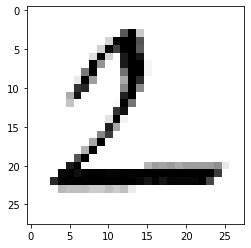

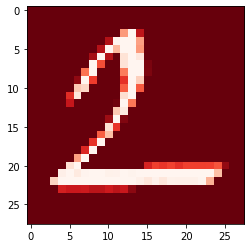

***correct_label: 0


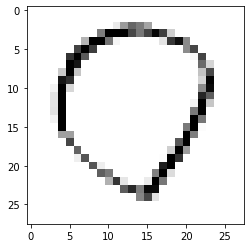

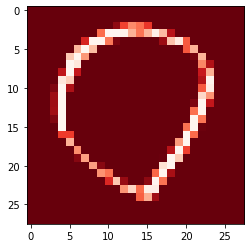

***correct_label: 1


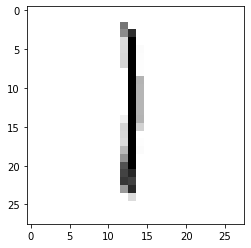

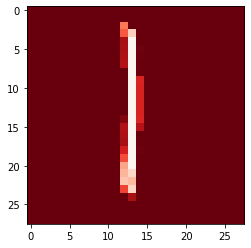

***correct_label: 5


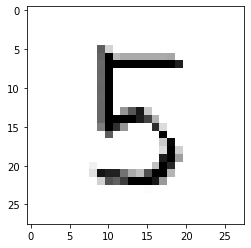

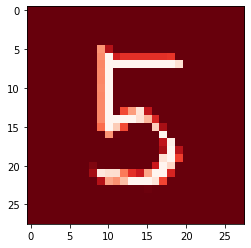

***correct_label: 0


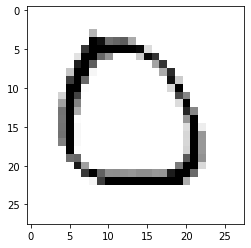

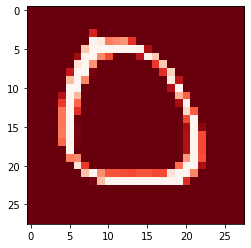

***correct_label: 0


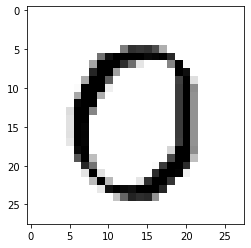

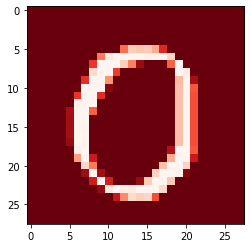

***correct_label: 6


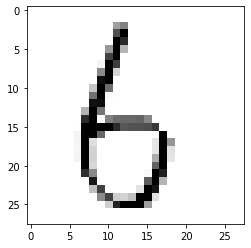

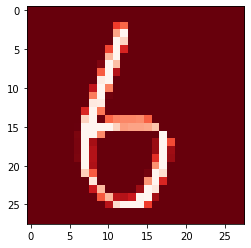

***correct_label: 8


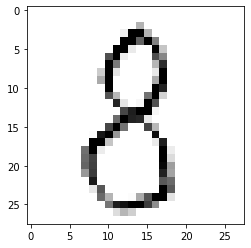

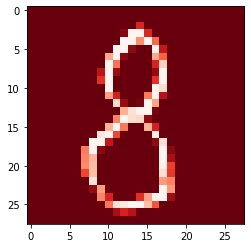

***correct_label: 4


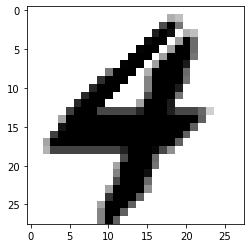

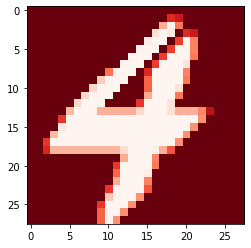

In [63]:
#  나만의 손글씨 인식시키기
# 그림판 글씨

import matplotlib.pyplot as plt
import imageio
import glob

test_image = []

for image_file_name in glob.glob("my_data/?my_own?.png"):
    correct_label=int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    image_array = image_array[:, :, 0] # 컬러를 그레이 스케일로 변환
    
    # 28 x 28 행렬 값을 784개 값의 리스로 재구성
    image_data = 255.0 - image_array.reshape(784) 
    
    # 색상값 반전
    image_data = (image_data/ 255.0 * 0.99)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    # test 배열에 삽입
    record = np.append(correct_label, image_data)
    test_image.append(record)

[[0.12074656]
 [0.01201496]
 [0.04853057]
 [0.22775887]
 [0.02641306]
 [0.07407109]
 [0.00586819]
 [0.02618061]
 [0.00156499]
 [0.00199433]]
network says  3
no match!


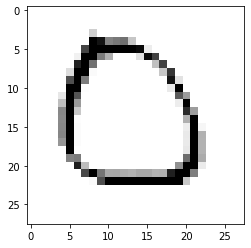

In [67]:
# test the neural network with our own images

# record to test
item = 4

# plot image
plt.imshow(test_image[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = test_image[item][0]
# data is remaining values
inputs = test_image[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

[[0.00627425]
 [0.86893717]
 [0.0352688 ]
 [0.06125653]
 [0.00289917]
 [0.02311122]
 [0.00925971]
 [0.00746894]
 [0.02310132]
 [0.02187803]]
network says  1
match!


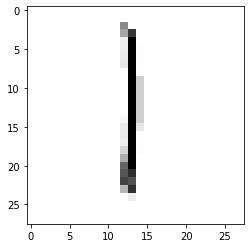

In [68]:
# test the neural network with our own images

# record to test
item = 2

# plot image
plt.imshow(test_image[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = test_image[item][0]
# data is remaining values
inputs = test_image[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [59]:
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

for record in test_image:
    # 정답은 첫번째 값
    correct_label = int(record[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
#     inputs = (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
    inputs = record[1:]
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

# 정답
scorecard_array = np.asarray(scorecard)
# print("performance =", scorecard_array.sum() / scorecard_array.size)
print("hidden_nodes1 =", hidden_nodes1, end="  ")
print("hidden_nodes2 =", hidden_nodes2, end="  ")
print("rate =", learning_rate, end="  ")
print("epochs =", epochs, end="  ")
print("performance =", scorecard_array.sum() / scorecard_array.size)

2 correct label
2 network's answer
0 correct label
3 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
0 correct label
3 network's answer
0 correct label
0 network's answer
6 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
hidden_nodes1 = 280  hidden_nodes2 = 80  rate = 0.01  epochs = 7  performance = 0.6666666666666666


***correct_label: 2


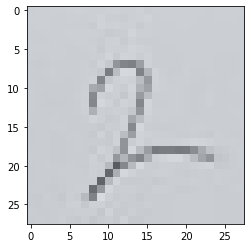

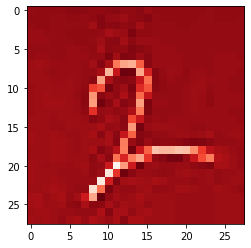

***correct_label: 0


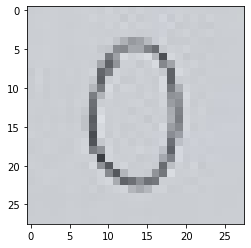

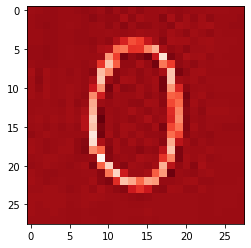

***correct_label: 1


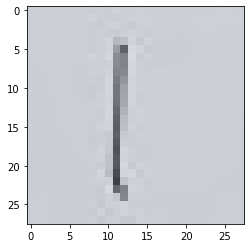

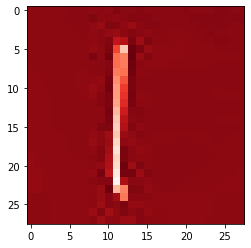

***correct_label: 5


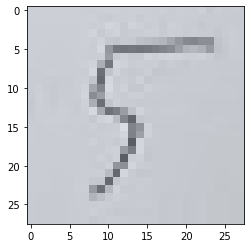

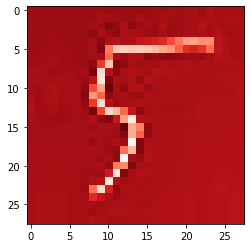

***correct_label: 0


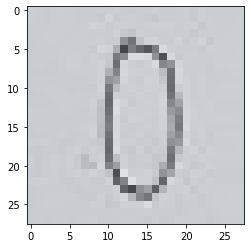

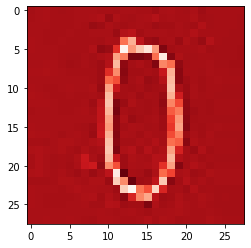

***correct_label: 0


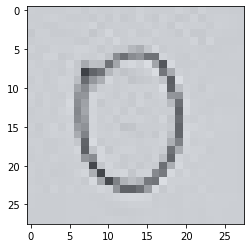

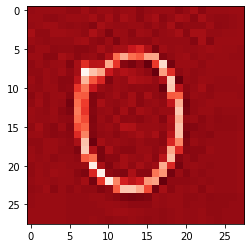

***correct_label: 6


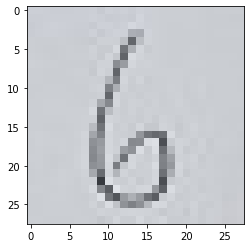

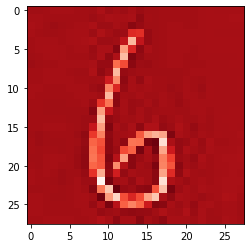

***correct_label: 8


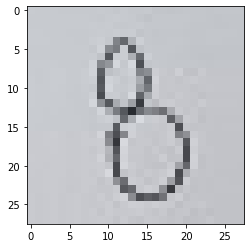

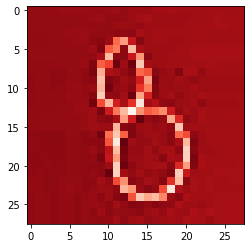

***correct_label: 4


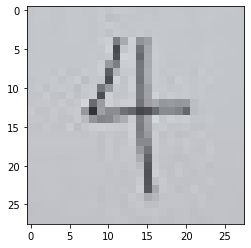

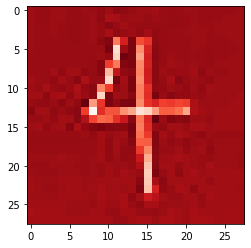

In [72]:
#  나만의 손글씨 인식시키기
# 볼펜 손글씨

import matplotlib.pyplot as plt
import imageio
import glob

test_image = []

for image_file_name in glob.glob("hand_made/?hand_label?.jpg"):
    
    correct_label=int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    image_array = image_array[:, :, 0] # 컬러를 그레이 스케일로 변환
    
    # 28 x 28 행렬 값을 784개 값의 리스로 재구성
    image_data = 255.0 - image_array.reshape(784) 
    
    # 색상값 반전
    image_data = (image_data/ 255.0 * 0.99)
    
    plt.imshow(image_array, cmap="Reds", interpolation="None")
    plt.show()
    
    # test 배열에 삽입
    record = np.append(correct_label, image_data)
    test_image.append(record)

In [73]:
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

for record in test_image:
    # 정답은 첫번째 값
    correct_label = int(record[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
#     inputs = (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
    inputs = record[1:]
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

# 정답
scorecard_array = np.asarray(scorecard)
# print("performance =", scorecard_array.sum() / scorecard_array.size)
print("hidden_nodes1 =", hidden_nodes1, end="  ")
print("hidden_nodes2 =", hidden_nodes2, end="  ")
print("rate =", learning_rate, end="  ")
print("epochs =", epochs, end="  ")
print("performance =", scorecard_array.sum() / scorecard_array.size)

2 correct label
5 network's answer
0 correct label
5 network's answer
1 correct label
5 network's answer
5 correct label
8 network's answer
0 correct label
5 network's answer
0 correct label
8 network's answer
6 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
8 network's answer
hidden_nodes1 = 280  hidden_nodes2 = 80  rate = 0.01  epochs = 7  performance = 0.1111111111111111


#### 그림판 글씨는 6/9 정답률을 보인다.
#### 반면 볼펜글씨는 1/9 정답률을 보이는데 얇아서 그런지 제대로 인지하지 못하고 있는 것 같다.

### 아래는 회전을 포함한 학습

In [3]:
import scipy.ndimage

# 노드의 갯수
input_nodes = 784
hidden_nodes1 = 280
hidden_nodes2 = 80
output_nodes = 10
# 학습률
learning_rate = 0.01
# 반복회수
epochs = 10

n = NeuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

print("학습시작")
# 학습
for e in range(epochs):
    print(f"epochs {e} done")
    for record in training_data_list:
        # 학습과정은 위와 동일
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        # 회전해서 학습시키기
        # 10도만큼 회전해서 학습
        inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        
        # -10도만큼 회전해서 학습
        inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28, 28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)
        
print("학습완료")

학습시작
epochs 0 done
epochs 1 done
epochs 2 done
epochs 3 done
epochs 4 done
epochs 5 done
epochs 6 done
epochs 7 done
epochs 8 done
epochs 9 done
학습완료


In [7]:
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    #print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

# mnist 데이터로 테스트해본 정확도
scorecard_array = np.asarray(scorecard)
# print("performance =", scorecard_array.sum() / scorecard_array.size)
print("hidden_nodes1 =", hidden_nodes1, end="  ")
print("hidden_nodes2 =", hidden_nodes2, end="  ")
print("rate =", learning_rate, end="  ")
print("epochs =", epochs, end="  ")
print("performance =", scorecard_array.sum() / scorecard_array.size)

hidden_nodes1 = 280  hidden_nodes2 = 80  rate = 0.01  epochs = 10  performance = 0.9687


In [8]:
#  나만의 손글씨 인식시키기
# 그림판 글씨

import matplotlib.pyplot as plt
import imageio
import glob

test_image = []

for image_file_name in glob.glob("my_data/?my_own?.png"):
    correct_label=int(image_file_name[-5:-4])
    print("***correct_label:", correct_label)
    
    image_array = imageio.imread(image_file_name)
    image_array = image_array[:, :, 0] # 컬러를 그레이 스케일로 변환
    
    # 28 x 28 행렬 값을 784개 값의 리스로 재구성
    image_data = 255.0 - image_array.reshape(784) 
    
    # 색상값 반전
    image_data = (image_data/ 255.0 * 0.99)
    
    # test 배열에 삽입
    record = np.append(correct_label, image_data)
    test_image.append(record)

***correct_label: 2
***correct_label: 0
***correct_label: 1
***correct_label: 5
***correct_label: 0
***correct_label: 0
***correct_label: 6
***correct_label: 8
***correct_label: 4


In [9]:
# 신경망의 성능 지표가 되는 성적표를 초기화함
scorecard = []

for record in test_image:
    # 정답은 첫번째 값
    correct_label = int(record[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
#     inputs = (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
    inputs = record[1:]
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

# 정답
scorecard_array = np.asarray(scorecard)
# print("performance =", scorecard_array.sum() / scorecard_array.size)
print("hidden_nodes1 =", hidden_nodes1, end="  ")
print("hidden_nodes2 =", hidden_nodes2, end="  ")
print("rate =", learning_rate, end="  ")
print("epochs =", epochs, end="  ")
print("performance =", scorecard_array.sum() / scorecard_array.size)

2 correct label
3 network's answer
0 correct label
5 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
0 correct label
3 network's answer
0 correct label
0 network's answer
6 correct label
4 network's answer
8 correct label
8 network's answer
4 correct label
9 network's answer
hidden_nodes1 = 280  hidden_nodes2 = 80  rate = 0.01  epochs = 10  performance = 0.4444444444444444


## 결론

볼펜으로 쓴 손글씨는 글씨가 너무 얇아 인식이 제대로 되지 않는 것으로 보아, 글씨가 두꺼울수록 신경망이 구별하는데 도움이 된다. 회전을 포함하여 MNIST 신경망을 모델을 만들었지만, 오히려 정확도가 약간 떨어졌다. 너무 많이 반복했거나, 은닉계층이 오히려 방해가 된 것 같다.

In [ ]:
# 201500684 박종혁